In [1]:
using Polynomials
# https://juliamath.github.io/Polynomials.jl/stable/
# https://docs.julialang.org/en/v1/manual/complex-and-rational-numbers/




In [49]:
os = 15;
ζ = -log(os/100)/sqrt( π^2 + log(os/100)^2 )

0.5169308662051556

In [58]:
Ts = 0.5;
# ω_n = -log(0.02*sqrt(1-ζ^2)) / (ζ * Ts);
ω_n = -log(0.02*sqrt(1-ζ^2)) / (ζ * Ts);# No Approximaition

# Tp = 0.3;
# ω_n = π / (Tp*√(1-ζ^2))

In [59]:
# [In]: Polynomial([1, 2*ζ*ω_n, ω_n^2]) # Julia follows the lowest order to the highest order
# [Out]: 1.0 + 19.971548490359943∙x + 209.3779583989147∙x2

# Desired Pole Location Based on Transient Requirement
pole_loc = roots( Polynomial([ω_n^2, 2*ζ*ω_n, 1]) )

2-element Vector{ComplexF64}:
 -8.134952385655723 - 13.471318027160054im
 -8.134952385655723 + 13.471318027160054im

In [60]:
log(ℯ)

1

In [61]:
# Desired Characteristic Equation Based on Transient Requirements
pole_choice = -10
pole_sys = fromroots([ pole_loc[1], pole_loc[2]]) # one-indexing for the input, zero indexing for output???

Polynomial(247.6538597057732 + 16.269904771311445*x + 1.0*x^2)

In [62]:
pole_loc[2]

-8.134952385655723 + 13.471318027160054im

### Simualtion

In [44]:
using ControlSystems
using Plots

In [45]:
num = [100, 1000];
den = [pole_sys[3], pole_sys[2], pole_sys[1], pole_sys[0]];
T = tf(num, den,)

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
                           100.0s + 1000.0
----------------------------------------------------------------------
1.0s^3 + 29.971548490359936s^2 + 409.093443302514s + 2093.779583989146

Continuous-time transfer function model

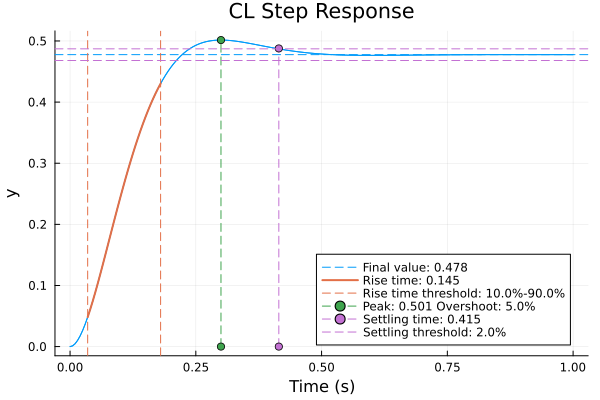

In [46]:
res = step(T,1)
plot(res, title="CL Step Response")
si = stepinfo(res)
display(plot!(si))

In [47]:
si

StepInfo:
Initial value:     0.000
Final value:       0.478
Step size:         0.478
Peak:              0.501
Peak time:         0.300 s
Overshoot:          4.99 %
Undershoot:         0.00 %
Settling time:     0.415 s
Rise time:         0.145 s
